# Home work week 2

In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [393]:
# Load dataset
df_housing = pd.read_csv("../database/housing.csv")

In [394]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Histogram for column `median_house_value`
It has a long tail from the right

In [395]:
# Histogram for column `median_house_value`
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Text(0, 0.5, 'Number of houses')

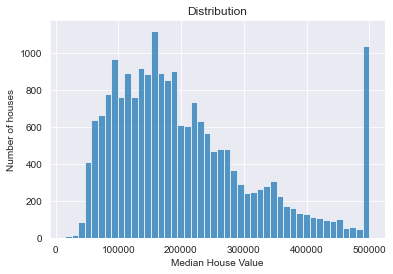

In [396]:
# Using seaborn
sns.set_style('darkgrid')
sns.histplot(df_housing.median_house_value)
plt.title("Distribution")
plt.xlabel("Median House Value")
plt.ylabel("Number of houses")


Text(0, 0.5, 'NUmber of houses')

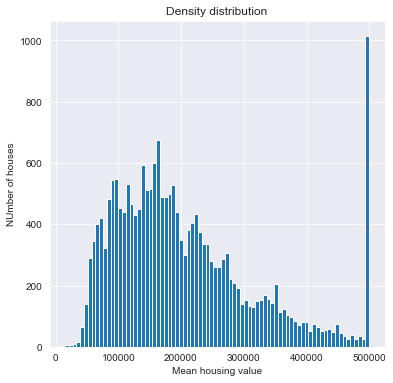

In [397]:
# Using matplotlib
fig, ax = plt.subplots(figsize=(6,6))
df_housing["median_house_value"].plot.hist(grid=True, bins=80)
ax.set_title("Density distribution")
ax.set_xlabel("Mean housing value")
ax.set_ylabel("NUmber of houses")

## Preparing dataset

In [398]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [399]:
# Keep records where `ocean_provimity` is either ' <1H OCEAN' or 'INLAND'
df_housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [400]:
df_restrict = df_housing[(df_housing.ocean_proximity=="<1H OCEAN")|(df_housing.ocean_proximity=="INLAND")]

In [401]:
columns = df_restrict.columns.to_list()

In [402]:
columns.remove("ocean_proximity")

In [403]:
df_restrict = df_restrict[columns]

##  Question 1
There's one feature with missing values. What is it?

In [404]:
# Finding missing values
series_countna = df_restrict.isna().sum()

In [405]:
missing_column = series_countna.where(series_countna>0).dropna().index.to_list() # Get list of all columns with missing value

In [406]:
missing_column

['total_bedrooms']

# Question 2
What's the median (50% percentile) for variable 'population'?

In [407]:
df_restrict.population.median()

1195.0

## Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [408]:
import random

In [409]:
random.seed(42)
length = len(df_restrict)
lst = list(range(length))
random.shuffle(lst)

In [410]:
len_train = int(length*0.6)
len_val = int(length*0.2)
len_test = length - len_train - len_val

In [411]:
df_restrict['median_house_value'] = df_restrict.median_house_value.apply(np.log1p)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

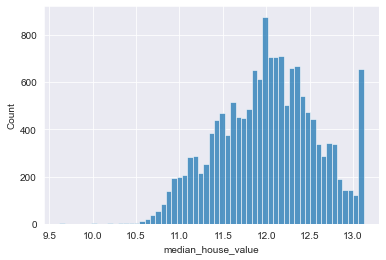

In [412]:
sns.histplot(df_restrict.median_house_value)

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
-Use the validation dataset to evaluate the models and compare the RMSE of each option.
-Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?


In [413]:
def train_linear_regression(X,y):
    X = np.insert(X, 0, [np.ones(X.shape[0])], axis=1)
    XTX = X.T.dot(X)
    w = np.linalg.inv(XTX).dot(X.T).dot(y)
    return w

In [414]:
X = np.array([[1, 2,5],
     [4, 7, 12],
     [3,5,1],
     [10,7,19]])
y = np.array([2,4,6,10])

In [415]:
np.insert(X, 0, [np.ones(X.shape[0])], axis=1)

array([[ 1,  1,  2,  5],
       [ 1,  4,  7, 12],
       [ 1,  3,  5,  1],
       [ 1, 10,  7, 19]])

In [416]:
train_linear_regression(X,y)

array([ 2.15019763,  1.35968379,  0.01581028, -0.3083004 ])

In [417]:
df_restrict.reset_index(inplace=True, drop=True)

In [418]:
df_restrict

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196
...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265758
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,11.252872
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432810
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346883


In [419]:
df_train = df_restrict.iloc[lst[:len_train]]
df_val = df_restrict.iloc[lst[len_train: len_train+len_val]]
df_test = df_restrict.iloc[len_train+len_val:]

In [420]:
assert df_train.shape[0]==len_train
assert df_val.shape[0]==len_val
assert len(df_test)==len_test

In [421]:
mean_house_value = df_train.median_house_value.mean()
print("Mean value of hause price in training set", round(mean_house_value,2))

Mean value of hause price in training set 12.01


# Calculate weights in linear model using closed form
1. Fill na with 0

In [422]:
X_train = df_train.drop('median_house_value', axis=1).to_numpy() 

In [423]:
np.isnan(X_train).sum()

90

In [424]:
# Fill missing values
def fill_nan(X, fill_value):
    X[np.isnan(X)] = fill_value
    return X

In [425]:
X_train = df_train.drop('median_house_value', axis=1).to_numpy() 
y_train = df_train['median_house_value'].to_numpy()

In [426]:
w_estimate_0 = train_linear_regression(fill_nan(X_train, 0), y_train)

In [427]:
w_estimate_0

array([-1.02390527e+01, -2.61920108e-01, -2.74680818e-01,  1.68212068e-03,
       -2.92324687e-05,  2.40950770e-04, -1.54123343e-04,  4.35165128e-04,
        1.78150661e-01])

In [428]:
# Calculate RMSE
def RMSE(X, y, w)->float: 
    X = np.insert(X, 0, [np.ones(X.shape[0])], axis=1)
    error = np.sqrt(np.square(X.dot(w) - y).mean())
    return error

In [429]:
X_val = df_val.drop('median_house_value', axis=1).to_numpy()
y_val = df_val['median_house_value'].to_numpy()

In [430]:
X_test = df_test.drop('median_house_value', axis=1).to_numpy()
y_test = df_test['median_house_value'].to_numpy()

In [431]:
print("RMSE is ", round(RMSE(fill_nan(X_val, 0), y_val, w_estimate_0),2))

RMSE is  0.34


2. Fill missing values with mean

In [432]:
w_estimate_mean = train_linear_regression(fill_nan(X_train, mean_house_value), y_train)

In [433]:
print("RMSE for validation set is ", round(RMSE(fill_nan(X_val, mean_house_value), y_val, w_estimate_mean),2))

RMSE for validation set is  0.34


In [434]:
print("RMSE for test set is ", round(RMSE(fill_nan(X_test, mean_house_value), y_test, w_estimate_mean),2))

RMSE for test set is  0.31


In [435]:
y_pred_val = np.insert(X_val, 0, [np.ones(X_val.shape[0])], axis=1).dot(w_estimate_mean)
y_pred_train = np.insert(X_train, 0, [np.ones(X_train.shape[0])], axis=1).dot(w_estimate_mean)

Text(0.5, 1.0, 'Histogram for validation set')

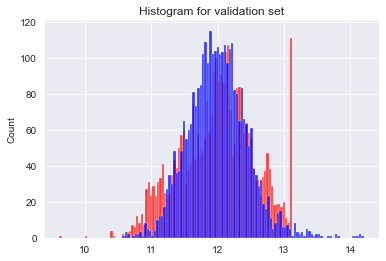

In [436]:
sns.histplot(y_val, color='red', bins=100)
sns.histplot(y_pred_val, color='blue', bins=100)
plt.title('Histogram for validation set')

Text(0.5, 1.0, 'Histogram for training set')

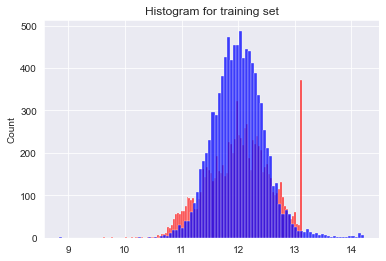

In [437]:
sns.histplot(y_train, color='red', bins=100)
sns.histplot(y_pred_train, color='blue', bins=100)
plt.title('Histogram for training set')

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [438]:
def train_linear_regression_reg(X, y, r):
    X = np.insert(X, 0, [np.ones(X.shape[0])], axis=1)
    XTX = X.T.dot(X) + r*np.eye(X.shape[1])
    w = np.linalg.inv(XTX).dot(X.T).dot(y)
    return w

In [439]:
w_estimate_reg = train_linear_regression_reg(X_train, y_train, 0)
#y_pred_val = np.insert(X_val, 0, [np.ones(X_val.shape[0])], axis=1).dot(w_estimate_reg)

In [440]:
lst_r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in lst_r:
    w_estimate_reg = train_linear_regression_reg(X_train, y_train, r)
    print('Regularized value r: ' + str(r) + ' with RMSE ' + str(RMSE(X_val, y_val, w_estimate_reg)))

Regularized value r: 0 with RMSE 0.3415837170902061
Regularized value r: 1e-06 with RMSE 0.3415837140132456
Regularized value r: 0.0001 with RMSE 0.3415834097703679
Regularized value r: 0.001 with RMSE 0.3415806803416724
Regularized value r: 0.01 with RMSE 0.3415568598505201
Regularized value r: 0.1 with RMSE 0.3415637308708935
Regularized value r: 1 with RMSE 0.344179086108881
Regularized value r: 5 with RMSE 0.34676638850808555
Regularized value r: 10 with RMSE 0.3473114873664567


In [449]:
lst_seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
def RMSE_seed(s):

    # Shuffle dataset
    random.seed(s)
    length = len(df_restrict)
    lst = list(range(length))
    random.shuffle(lst)

    # Split dataset to train, validation and test set
    len_train = int(length*0.6)
    len_val = int(length*0.2)
    len_test = length - len_train - len_val
    df_train = df_restrict.iloc[lst[:len_train]]
    df_val = df_restrict.iloc[lst[len_train: len_train+len_val]]
    df_test = df_restrict.iloc[len_train+len_val:]

    # Convert pandas dataframe to numpy array
    X_train = df_train.drop('median_house_value', axis=1).to_numpy() 
    y_train = df_train['median_house_value'].to_numpy()
    X_val = df_val.drop('median_house_value', axis=1).to_numpy() 
    y_val = df_val['median_house_value'].to_numpy()
    X_test = df_test.drop('median_house_value', axis=1).to_numpy() 
    y_test = df_test['median_house_value'].to_numpy()

    # Training model and estimate error
    w_estimate = train_linear_regression(fill_nan(X_train, 0), y_train)
    rmse_error = RMSE(fill_nan(X_val, 0), y_val, w_estimate)
    
    return rmse_error 

In [452]:
lst_error = []
for s in lst_seed:
    error = round(RMSE_seed(s),3)
    lst_error.append(error)
    print('Seed '+ str(s) + " with RMSE ", str(error))

Seed 0 with RMSE  0.344
Seed 1 with RMSE  0.337
Seed 2 with RMSE  0.331
Seed 3 with RMSE  0.328
Seed 4 with RMSE  0.345
Seed 5 with RMSE  0.35
Seed 6 with RMSE  0.346
Seed 7 with RMSE  0.342
Seed 8 with RMSE  0.332
Seed 9 with RMSE  0.328


In [453]:
np.std(lst_error)

0.007707788269017238

In [464]:
def RMSE_seed_combine(s):

    # Shuffle dataset
    random.seed(s)
    length = len(df_restrict)
    lst = list(range(length))
    random.shuffle(lst)

    # Split dataset to train, validation and test set
    len_train = int(length*0.6)
    len_val = int(length*0.2)
    len_test = length - len_train - len_val
    df_train = df_restrict.iloc[lst[:len_train]]
    df_val = df_restrict.iloc[lst[len_train: len_train+len_val]]
    df_test = df_restrict.iloc[len_train+len_val:]

    # Convert pandas dataframe to numpy array
    X_train = df_train.drop('median_house_value', axis=1).to_numpy() 
    y_train = df_train['median_house_value'].to_numpy()
    X_val = df_val.drop('median_house_value', axis=1).to_numpy() 
    y_val = df_val['median_house_value'].to_numpy()
    X_test = df_test.drop('median_house_value', axis=1).to_numpy() 
    y_test = df_test['median_house_value'].to_numpy()

    # Combine train and validation set
    X_train = np.concatenate((X_train, X_val))
    y_train = np.concatenate((y_train, y_val))

    # Training model and estimate error
    w_estimate = train_linear_regression_reg(fill_nan(X_train, 0), y_train, r = 0.0001)
    rmse_error = RMSE(fill_nan(X_test, 0), y_test, w_estimate)
    
    return rmse_error 

In [465]:
RMSE_seed_combine(9)

0.3057782658980619